In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns   
from IPython.core.display import HTML
from collections import Counter
import re

In [2]:
survey = pd.read_csv('datascience_survey.csv')

In [60]:
def bar_chart(question_nr,width=5,height=10):
    responses = survey[question_nr].dropna().tolist()
    counts = Counter(responses)
    y_axis = list(counts.keys())
    x_axis = list(counts.values())

    sns.set(rc={'figure.figsize':(width,height)})

    sns.barplot( x=x_axis, 
                y=y_axis , 
               color = '#fcba03' )
    plt.show()
    
def print_responses(question_nr):
    responses = survey[question_nr]
    for i,response in enumerate(responses):
        if not pd.isna(response):
            print(f"{i+2}. {response}")
            print('----------')

In [4]:
# first two rows contain column names and data types
questions = survey.iloc[0]
survey = survey.iloc[2:]

## Response

In [5]:
print( f'There are {survey.shape[0]} responses')

There are 86 responses


In [6]:
survey['date']= pd.to_datetime(survey['StartDate'])

In [7]:
print(f"The surveys have been completed in between {survey['date'].min().strftime('%Y-%m-%d')} and {survey['date'].max().strftime('%Y-%m-%d')}")

The surveys have been completed in between 2022-12-01 and 2023-06-02


The surveys have not been filled out completely in all cases. 

In [8]:
progress = survey.groupby('Progress')['ResponseId'].count()
progress_dict = progress.to_dict()
# Convert string keys to integers
progress_dict = {int(k):int(v) for k,v in progress_dict.items()}
for percentage in sorted(progress_dict):
    print(f'{percentage}% : {progress_dict[percentage]}')

0% : 7
5% : 14
10% : 15
25% : 4
30% : 11
40% : 4
45% : 4
60% : 5
70% : 3
80% : 1
95% : 2
100% : 16


## Job title

In [9]:
questions['Q4']

'What is your job title?'

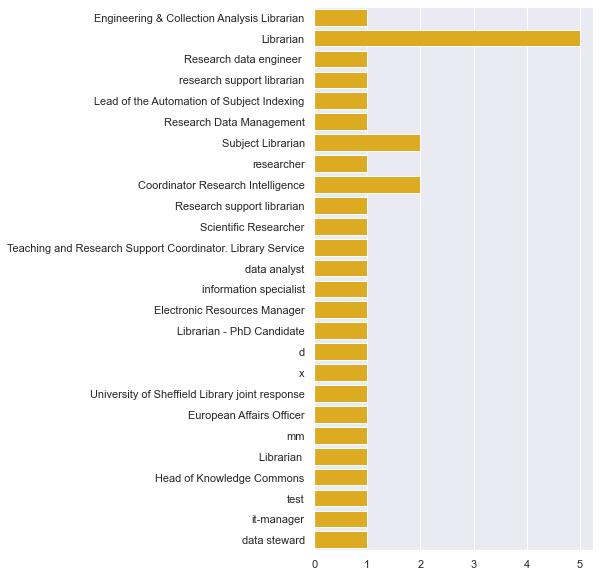

In [10]:
bar_chart('Q4')

## Institutions

In [11]:
questions['Q5']

'Which library are you affiliated with?'

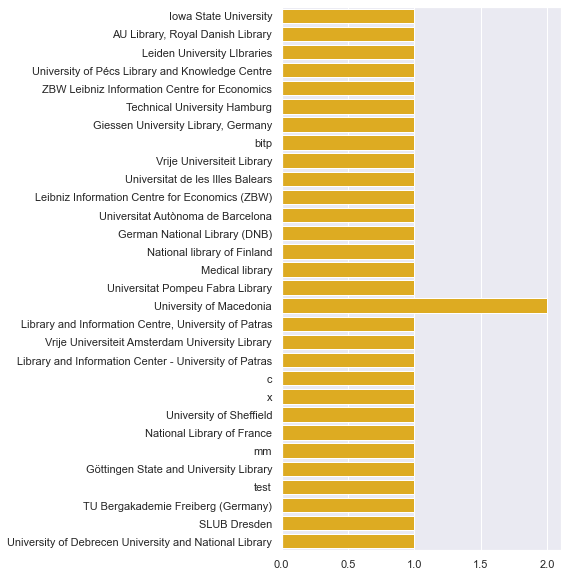

In [12]:
bar_chart('Q5')

## Data science activities

In [13]:
print(questions['Q7'])

Which categories apply to your data science activities? (multiple options possible)


In [14]:
print_responses('Q7')

#print_responses('Q10')

Library Intelligence

Data science activities geared towards the improvement of traditional library services and support for decision-making by library management. 

Examples are data-driven item suggestions for library patrons, the application of machine learning techniques in the management of library material flows, the use of library loan data analytics in collection management, and automated library analytics for day-to-day planning and annual reports.
 ,Research Intelligence

Data science activities in compiling and visualizing data for decisions and benchmarking within the scientific community. Given the scale of the data available, Research Intelligence often requires the implementation of data pipelines and dashboard tools. 

Examples of data collected are metadata of publications and other research outputs, and data related to these outputs such as citations. An integral part of RI is also the continuous development of analysis workflows, for instance combining traditional ci

In [15]:
categories = ['Library Intelligence','Research Support',
'Collections as Data','Research Intelligence']

categories_count = Counter()

responses = survey['Q7'].dropna().tolist()
for response in responses:
    selected_categories = []
    for c in categories:
        if re.search( r'\b{}\b'.format(c) , response ):
            selected_categories.append(c)
    print(selected_categories)
    categories_count.update(selected_categories)
            


['Library Intelligence', 'Research Intelligence']
['Library Intelligence', 'Research Support', 'Research Intelligence']
['Research Support', 'Collections as Data']
['Research Support']
['Research Support']
['Research Support', 'Collections as Data']
['Research Support', 'Collections as Data']
['Research Support']
['Library Intelligence', 'Research Support', 'Collections as Data', 'Research Intelligence']
['Research Support', 'Research Intelligence']
['Library Intelligence', 'Research Support', 'Collections as Data', 'Research Intelligence']
['Research Support']
['Library Intelligence', 'Research Support', 'Collections as Data']
['Research Support', 'Collections as Data', 'Research Intelligence']
['Research Support', 'Research Intelligence']
['Research Support']
['Library Intelligence', 'Research Support', 'Collections as Data', 'Research Intelligence']
['Research Support', 'Collections as Data']
['Collections as Data']
['Library Intelligence', 'Research Support', 'Collections as Data']

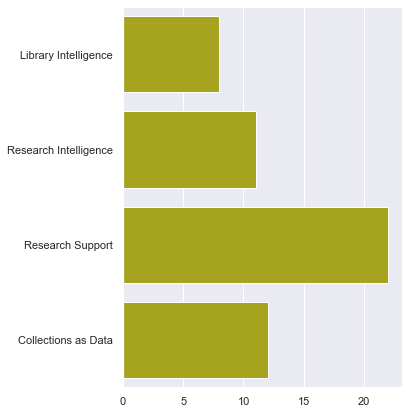

In [16]:
y_axis = list(categories_count.keys())
x_axis = list(categories_count.values())

sns.set(rc={'figure.figsize':(5,7)})

sns.barplot( x=x_axis, 
            y=y_axis , 
           color = '#bcba09' )
plt.show()

Respondents appear to agree with the overview of data science activties. There was only one suggestion for a new category. 

In [17]:
disagreement = survey['Q8'].dropna().tolist()
for response in disagreement:
    print(response)


Student support
New category: "education support"?


## Library Intelligence

In [18]:
print(questions['Q9'])

Describe the current data science activities in your library.



In your answers, you are invited to be as specific as possible. You are welcome to provide concrete use examples and data science methods.



If you find it helpful, you may specify when your answers relate to one or more of the aforementioned categories or divide your answers based on the aforementioned categories:

	Collections as Data
	Library Intelligence
	Research Support
	Research Intelligence
	Other


In [19]:
print_responses('Q9')

Library Intelligence - support decision-making by library management. Use data from the service Unsub to make a first pass at journal renewal and cancellation decisions. Subject specialists also weigh in with their views.

Research Intelligence - metadata of publications to understand where our faculty choose to publish. I construct a pie chart each year showing how our campus output breaks down by publisher share. How does this vary over time? Are certain publishers increasing or decreasing? This in turn is used to inform which publishers we approach or engage in negotiating Open Access agreements for our campus.
----------
Library Intelligence: Collection of statistics regarding user support, collections, facilities for planning, national library statistics, and annual reports.
Research Support: Data management plans, collection of data, computational literature reviews.
Research Intelligence: Bibliometric analyses.
Student support: Courses in data analytics, courses in text mining.


## Tasks and responsibilities of library staff working with data science

In [20]:
questions['Q10']

'Which department(s), team(s), or similar entities carry out data science activities in your library?'

In [21]:
print_responses('Q10')

Mostly just me. My position is split half liaison librarian, half collection analysis. I support our Collection Development Management Team with data to help make decisions.
----------
The activities are spread over several library units.
----------
Department of Publication and Research Assistance
----------
The department is called "Research Support Services".
----------
Medicine
----------
Data science activities are carried oiut in all departments, but are concentrated in the departments for Research Support and for Digital infrastructure
----------
Research Support Unit
----------
Academic Services; User Services; Information Provision & Access; Digital Economics Innovative; Information Systems & Publishing Technologies
----------
The teaching and research support manager
----------
'-	Collections as data Data management team (part of IT department) Department for Automatic Indexing Online Publications Researchers at German Museum for Books and Writing (DBSM, part of DNB) Project 

In [22]:
print(questions['Q11'])

Describe the staff responsible for data science activities.



For example:

	What is their background?
	What are their qualifications and training?
	What are their specific roles in the organization?


In [23]:
print_responses('Q11')

I have a Bachelors of Science in Electrical Engineering and spent 10 years as an engineer at Intel. I also have a Masters of Library and Information Science. Collection Analysis is something that I have gradually added to my position starting in January 2020. I am mostly self-taught through webinars, Lynda.com, LinkedIn Learning, edX, Medium, and other resources.
----------
Background: Different university backgrounds, librarians.
Qualifications and training: Some people have qualifications from their educational background, others have studied data science out of a personal interest, some have taken courses in data science or participated in workshops.
Roles: They work as librarians or data specialists.
----------
The Centre for Digital Scholarship employs two data scientists. Both have a background in Computer Science. One data scientist also holds a PhD in Digital Humanities / Computational Literary Studies. The research data engineers offers support to researchers who want to make 

In [24]:
print(questions['Q12'])

Who does the library collaborate with, internally or externally to the institution, in carrying out data science activities?


In [25]:
print_responses('Q12')

Involved with the ESAC Data Analytics Working Group, though haven't met recently.  Mostly work with colleagues on Twitter or vendors with specific questions.
----------
There are networks of people working with data science inside the library and between libraries.
----------
Internally: with curators and project managers of the Special Collections department; the library's IT department, the Projects and Innovations department and subject librarians
Externally: Individual researchers, the institutional Open Science programme, The Grants office (LURIS), the university's IT department, data stewards at Faculties
----------
internally collaborate: with Partnerships and Services Marketing Department and Library Leadership.
externally collaborate: with University Information and Innovation Directorate and Vice-Dean of Science and Rector
----------
The position of the Research data consultant is currently part of the libraries staff.
----------
me
----------
'- Other academic libraries, nat

## Challenges

In [46]:
print(questions['Q13'])

What are the challenges faced by the library in carrying out data science activities? 

These can be any barriers or difficulties in implementing data science activities.


In [61]:
print_responses('Q13')

2. Lack of staff. It's only me and I have a list of ideas that I'll never have the time to get to. Hard to communicate what exactly I do. Often called "magic" here. 
----------
3. It takes a lot of time to get the qualifications to develop data science activities.
----------
4. CapacityL: there is a high demand for support of this nature, while our centre only employs two data scientists. Projects tend to be time-consuming. In some cases, researchers lack a good understanding of techniques. In such situtations, quite some time is needed to explain concepts and techniques. Researchers often work with with materials that cannot easily be searched using data science techniques (e.g. texts in non-Western scripts, documents which cannot be OCR'ed well, historical texts). There can also be copyright issues.
----------
5. lack of physical back-up storage, Lack of processes and systems: When data is gathered from many sources, inconsistency in the data is unavoidable. Inadequate data managemen

In [28]:
challenges = {1:'Lack of staff',
 2:'Staff has insuffient skills',
 3:'Lack of awareness of what data science entails',
 4:'Low data quality or inaccurate data',
 5:'Copyright issues',
 6:'Insfrastructural problems',
 7:'No policy / no mandata from management',
 8:'Lack of awareness among researchers',
 9:'No or poor accessibility of the data'
}

In [29]:
challenges_responses = {
2:[1,3],
3:[2],
4:[1,3,4,5],
5:[4,6],
24:[1],
30:[1,2],
31:[3,2,7],
32:[1,2,4],
33:[8],
35:[4,9,6],
37:[1],
38:[1],
51:[1,2,8] ,
60: [5,]}

In [30]:
challenges_counter = Counter()
for c in challenges_responses.values():
    challenges_counter.update(c)
    

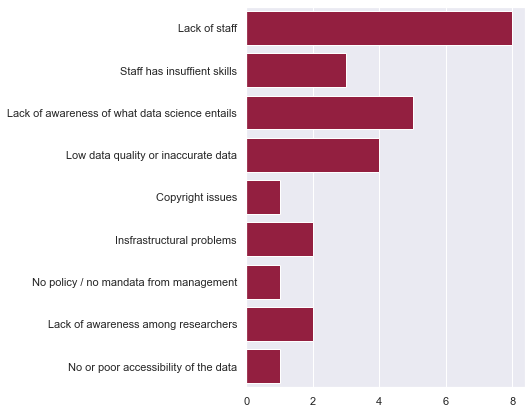

In [41]:
y_axis = list(challenges.values())

x_axis = list(challenges_counter.values())

sns.set(rc={'figure.figsize':(5,7)})

sns.barplot( x=x_axis, 
            y=y_axis , 
           color = '#a60c37' )
plt.show()

In [32]:
print(questions['Q14'])

Does the library have ways of addressing legal or ethical challenges related to data science activities?


In [33]:
print_responses('Q14')

Not really
----------
We give consideration to the rights and terms when we collect data. Ethical aspects are considered when we make bibliometric analyses.
----------
The library has a 'Copyright Information Point' which can advise on these matters. In some cases, additional budgets can be allocated to gain access to specific collections. 
----------
The university has a legal department, we work with them.
----------
We act conforming to the German copyright law and also are aware of the CARE principles.
----------
xx
----------
Legal: legal & privacy officers available at university.
Ethical: no structured method, issues discussed as they become relevant 
----------
Library has some resources, but we send the other things to the legal department of the university.
----------
Legal department, but sometimes really difficult to find solutions (e.g. what can we do with abstracts…?)
----------
Yes. The university has a Legal Office and a Data Protection Officer. Both of them help us in 

### Summary

* Not really
* The library has a 'Copyright Information Point' which can advise on these matters. The university has a legal department, we work with them.  legal & privacy officers available at university. sometimes really difficult to find solutions (e.g. what can we do with abstracts…?) The university has a Legal Office and a Data Protection Officer. We send them to the university's Legal Advisory Service. 
Contact with the University Data Protection Office around governance for data collection/storage. Jisc negotiate the majority of our license terms
* No personal data of users are collected in the statistics used for library intelligence purposes.
Training is provided in relation to personal identifiers and the wider context of ethical issues when using data to produce statistics.  
* We give consideration to the rights and terms when we collect data. Ethical aspects are considered when we make bibliometric analyses. We act conforming to the German copyright law and 
also are aware of the CARE principles.
* Ethical: no structured method, issues discussed as they become relevant 




The involvement in the Text+ consortium within the German National Research Data Infrastructure (NFDI) gives the German National Library (DNB) the opportunity to engage in finding ways to allow research on material protected by copyright, e.g. by provoding derived text formats, as this is a major issue in the work programme. Another milestone is an „Assessment of the impact of the Directive on Copyright in the Digital Single Market and its German transposition on the legal status of Collections“. The DNB is also involved in the NFDI wide section Ethical, Legal and Social Aspects (ELSA). 






## Funding

In [34]:
print(questions['Q15'])

How are the data science activities typically funded?


In [35]:
print_responses('Q15')

No additional or special funding beyond my regular salary
----------
Internal funding.
----------
We are often involved in externally funded research projects. Our activities can often be funded using these research budgets. In other cases, we are funded by the library. 
----------
from university or library budget
----------
Ministry for Science of the federal state.
----------
..
----------
'- library budget 
- university funding for projects
----------
We use the university resources. Researchers have budgets from the university or from other funders (institutional funders, usually).
----------
Internal budget, personnel
Projects/third-party funding

----------
With European projects or the National Research Agency. 
----------
internally, sometimes projects funded by German Research Foundation partly under the  German National Research Data Infrastructure (NFDI) framework, the German Research Foundation (DFG) or the commissioner of the federal government for culture and media
-----

### Summary

Three main sources of funding are mentioned:

* Regular salaries (library budget)
* University funding for projects
* Involvement in externally funded research projects / grants provided by research projects / Funding by research councils (Ministry for Science of the federal state, EU, National Research Agency, German National Research Data Infrastructure (NFDI) framework, the German Research Foundation (DFG), Commissioner of the federal government for culture and media)


## Ambitions

In [36]:
print(questions['Q16'])

What library data science activities are planned (if any) in the future?


In [37]:
print_responses('Q16')

Automating the publishing profiler in Python, automating a name lookup in the staff directory to see who an author is (department, college, level). 
----------
We work continuously on developing data science skills among the library staff.
We are in contact with the faculty on how to support them with teaching.
----------
Development of courses on Machine Learning; Organisation of Summer School on digital scholarship; Involvement in research projects working with Linked Open Data; Setting up a 'data foundry' to facilitate the use of 'Collections as Data'; Setting up projects in the field of research intelligence
----------
1. Evaluation of the activies and the needs by using data science method, e.g. web analytics of our discovery system.

2. Supporting workflows and processes like cataloging with AI and similar methods.
----------
..
----------
'- Improved automated collection of currently non-standard research activities (eg media appearances)
- automated cataloging/attribution of me

In [38]:
print(questions['Q17'])

Anything else to add?


In [39]:
print_responses('Q17')

In the Netherlands, topics such as these are also discussed in the UKB Digital Scholarship working group.
----------
I have used a very broad definition of data science, including more social/community related tasks that are important to increase acceptance of the more 'technical' tasks. 
----------
How I can join in the projects conducted by LIBER,?
----------


A number of respondents had indicated that they may be contacted if we need further information. The mail addresses are in the survey results.